In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [329]:
data = {
    'bulan': ['Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember','Januari','Februari','Maret','April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober'],
    'periode': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'stok' :[300, 320, 340, 310, 330, 280, 270, 290, 305, 315, 325, 335, 345, 285, 295, 305, 310, 320, 330, 340],
    'cuaca' : ['Cerah', 'Cerah', 'Hujan', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Hujan', 'Mendung', 'Hujan','Mendung', 'Cerah', 'Hujan', 'Cerah', 'Hujan', 'Mendung', 'Hujan', 'Cerah', 'Mendung', 'Mendung'],
    'penjualan': [208, 181, 70, 80, 199, 214, 134, 139, 215, 139,144,168,131,187,116,136,128,166,182,163],
}

df = pd.DataFrame(data)
df

,bulan,periode,stok,cuaca,penjualan
0,Maret,1,300,Cerah,208
1,April,2,320,Cerah,181
2,Mei,3,340,Hujan,70
3,Juni,4,310,Hujan,80
4,Juli,5,330,Mendung,199
5,Agustus,6,280,Cerah,214
6,September,7,270,Hujan,134
7,Oktober,8,290,Hujan,139
8,November,9,305,Mendung,215
9,Desember,10,315,Hujan,139


In [330]:
df =df.drop(['bulan'],axis=1)

In [331]:
mapping_cuaca = {'Cerah': 3, 'Mendung': 2, 'Hujan': 1}
df['cuaca'] = df['cuaca'].map(mapping_cuaca)
df

,periode,stok,cuaca,penjualan
0,1,300,3,208
1,2,320,3,181
2,3,340,1,70
3,4,310,1,80
4,5,330,2,199
5,6,280,3,214
6,7,270,1,134
7,8,290,1,139
8,9,305,2,215
9,10,315,1,139


In [332]:
df = df.rename(columns={'periode': 'x1', 'stok': 'x2','cuaca':'x3','penjualan' :'y'})
df

,x1,x2,x3,y
0,1,300,3,208
1,2,320,3,181
2,3,340,1,70
3,4,310,1,80
4,5,330,2,199
5,6,280,3,214
6,7,270,1,134
7,8,290,1,139
8,9,305,2,215
9,10,315,1,139


### **Total x**

In [333]:
total_x1 = df['x1'].sum()
total_x2 = df['x2'].sum()
total_x3 = df['x3'].sum()
total_y = df['y'].sum()

total_x1, total_x2, total_x3

(210, 6250, 38)

### **Total x pangkat**

In [334]:
x1_square = df.x1.apply(lambda x : x ** 2)
x2_square = df.x2.apply(lambda x : x ** 2)
x3_square = df.x3.apply(lambda x : x ** 2)
total_x1_square = df.x1.apply(lambda x : x ** 2).sum()
total_x2_square = df.x2.apply(lambda x : x ** 2).sum()
total_x3_square = df.x3.apply(lambda x : x ** 2).sum()
x_value = pd.DataFrame({'x1':x1,'x2': x2,'x3':x3})
print(total_x1_square,total_x2_square,total_x3_square)
x_value

2870 1961800 86


,x1,x2,x3
0,1,90000,9
1,4,102400,9
2,9,115600,1
3,16,96100,1
4,25,108900,4
5,36,78400,9
6,49,72900,1
7,64,84100,1
8,81,93025,4
9,100,99225,1


### **Total xy**

In [335]:
x1y = df.x1 * df.y
x2y = df.x2 * df.y
x3y = df.x3 * df.y

total_x1y = (df.x1 * df.y).sum()
total_x2y = (df.x2 * df.y).sum()
total_x3y = (df.x3 * df.y).sum()
xy_value = pd.DataFrame({'x1y': x1y,'x2y': x2y,'x3y': x3y})
print(total_x1y,total_x2y,total_x3y)
xy_value

32473 965910 6387


,x1y,x2y,x3y
0,208,62400,624
1,362,57920,543
2,210,23800,70
3,320,24800,80
4,995,65670,398
5,1284,59920,642
6,938,36180,134
7,1112,40310,139
8,1935,65575,430
9,1390,43785,139


In [357]:
N = len(df)
N

20

### **Fungsi a,b**

In [423]:
def koefisien_multivariable(total_x1, total_x2, total_x3, total_y, total_x1_square, total_x2_square, total_x3_square, total_x1y, total_x2y, total_x3y, N):
    a1 = ((N * total_x1y) - (total_x1 * total_y)) / ((N * total_x1_square) - (total_x1 ** 2))
    a2 = ((N * total_x2y) - (total_x2 * total_y)) / ((N * total_x2_square) - (total_x2 ** 2))
    a3 = ((N * total_x3y) - (total_x3 * total_y)) / ((N * total_x3_square) - (total_x3 ** 2))
    return a1, a2, a3

def konstanta(total_x1, total_x2, total_x3, total_y, total_x1_square, total_x2_square, total_x3_square, total_x1y, total_x2y, total_x3y, N):
   b = (total_y - (a1 * total_x1) - (a2 * total_x2) - (a3 * total_x3)) / N
   return b

In [424]:
a1, a2,a3 = koefisien_multivariable(total_x1, total_x2, total_x3, total_y, total_x1_square, total_x2_square, total_x3_square, total_x1y, total_x2y, total_x3y, N)
b = konstanta(total_x1, total_x2, total_x3, total_y, total_x1_square, total_x2_square, total_x3_square, total_x1y, total_x2y, total_x3y, N)

In [425]:
print(f'Koefisien a1: {a1}')
print(f'Koefisien a2: {a2}')
print(f'Koefisien a3: {a3}')
print(f'Konstanta b: {b}')

Koefisien a1: -0.11578947368421053
Koefisien a2: -0.3273775216138329
Koefisien a3: 36.01449275362319
Konstanta b: 190.09372874612296


### **Hitung Manual**

In [409]:
190.09372874612296 + (-0.11578947368421053 * 1) + (-0.3273775216138329 * 300) + (36.01449275362319 * 3)

199.80816104915846

In [420]:
190.09372874612296 + (-0.11578947368421053 * 2) + (-0.3273775216138329 * 320) + (36.01449275362319 * 3)

193.1448211431976

In [421]:
intercept = 190.09372874612296
koefisien = [-0.11578947368421053, -0.3273775216138329, 36.01449275362319]

data=[]

for index, row in df.iterrows():
    xn = [row['x1'], row['x2'], row['x3']]
    nilai_y = intercept
    for i in range(len(xn)):
        nilai_y += koefisien[i] * xn[i]
    data.append(nilai_y)

In [422]:
perbandingan = pd.DataFrame({'Penjualan': df.y, 'Predicted': data})
perbandingan

,Penjualan,Predicted
0,208,199.808161
1,181,193.144821
2,70,114.452496
3,80,124.158032
4,199,153.509185
5,214,205.776764
6,134,136.905764
7,139,130.242424
8,215,161.230465
9,139,121.826407


### **Modeling scikit-learn**

In [367]:
X = df[['x1','x2','x3']]
Y = df['y']

In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=0)

In [369]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [406]:
print(lr.intercept_)

186.55509803367596


In [407]:
print(lr.coef_)

[-0.19848818 -0.31805783 34.99430727]


### **Model Prediction**

In [414]:
Y_test_pred = lr.predict(X_test)
Y_train_pred = lr.predict(X_train)

In [415]:
data_predict = pd.DataFrame({
    'Actual' : Y_test,
    'Predicted' : Y_test_pred
})
data_predict

,Actual,Predicted
18,182,147.813353
1,181,189.362537
19,163,144.434286
8,215,157.749680
10,144,150.991547
17,166,186.186727
6,134,134.284374
13,187,198.112703
4,199,150.592187
2,70,112.814278


### **Visualization**

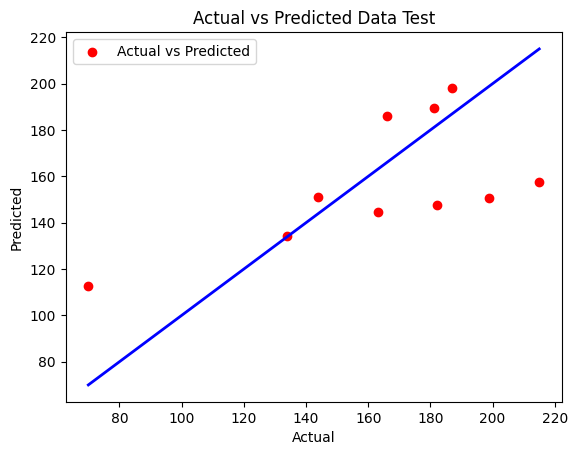

In [416]:
plt.scatter(Y_test, Y_test_pred, color='r', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue', linewidth=2)
plt.legend()
plt.title('Actual vs Predicted Data Test')
plt.show()

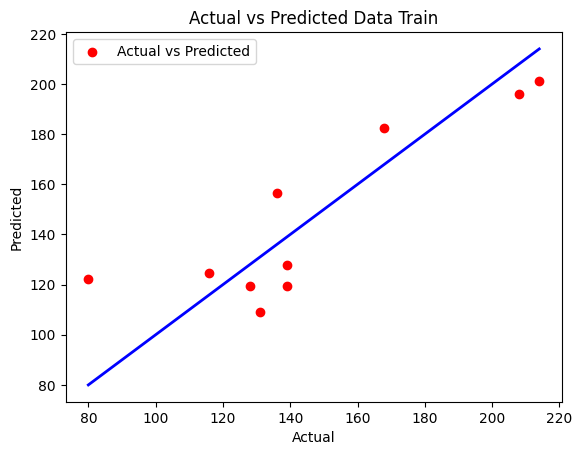

In [417]:
plt.scatter(Y_train, Y_train_pred, color='r', label='Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='blue', linewidth=2)
plt.legend()
plt.title('Actual vs Predicted Data Train')
plt.show()

### **Evaluation**

In [430]:
mse1 = mean_squared_error(Y_train, Y_train_pred)
rmse1 = sqrt(mse1)
rmse1

19.610526030820886

In [432]:
mse2 = mean_squared_error(Y_test, Y_test_pred)
rmse2 = sqrt(mse2)
rmse2

31.011741553313968